# `Cartopy` 地图绘制（1）
![](https://scitools.org.uk/cartopy/docs/latest/_static/cartopy.png)

**Carto**graphy **Py**thon

------------------------
主讲人：李显祥

大气科学学院

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

%matplotlib inline

`Cartopy` 用于基于地图的数据可视化。它依赖于以下包：

- `matplotlib`
- `numpy`
- `proj4`
- `shapely`

它取代 `Basemap`，但是还没有完全实现 `Basemap` 的所有功能。

## 投影 Projection

<table width='100%'><tr><td width='50%'><img src='China_map_mercator.png' width='400' algin='right'/></td><td width='50%'><img src='China_map_Lambert.png' width='400' align='left'/></td></tr></table>

- 为了将地球（或者地球的一部分）画到平面上（纸上或者屏幕上），我们需要投影（Projections）。

- `Cartopy` 通过 `crs` 子模块提供了很多不同的投影法。

- `Cartopy` 依赖于 `matplotlib`, 每一种投影方法会创建 `matplotlib` `Axes`（或者 `AxesSubplot`）用来绘制数据。

- 投影创建的 `Axes` 是一个 `cartopy.mpl.geoaxes.GeoAxes` 对象。 这个 `Axes` 子类重载（override）了 `matplotlib` 的一些方法，并添加了一些非常有用的方法，尤其是用来绘制地图的方法。

/Users/lixx/miniconda3/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:163: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


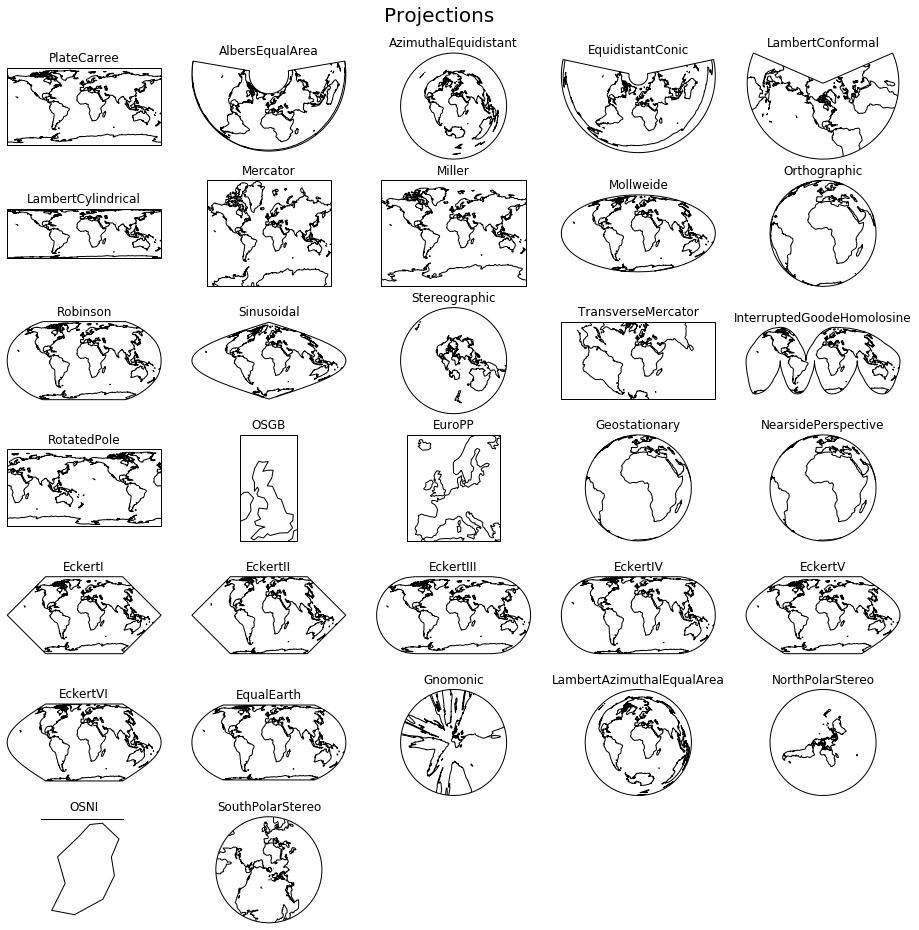

In [2]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()} #, 'Geodetic': ccrs.Geodetic()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.set_global()
    ax.coastlines()
    ax.set_title(projection[0])

Text(0.5, 1.0, 'Geostationary')

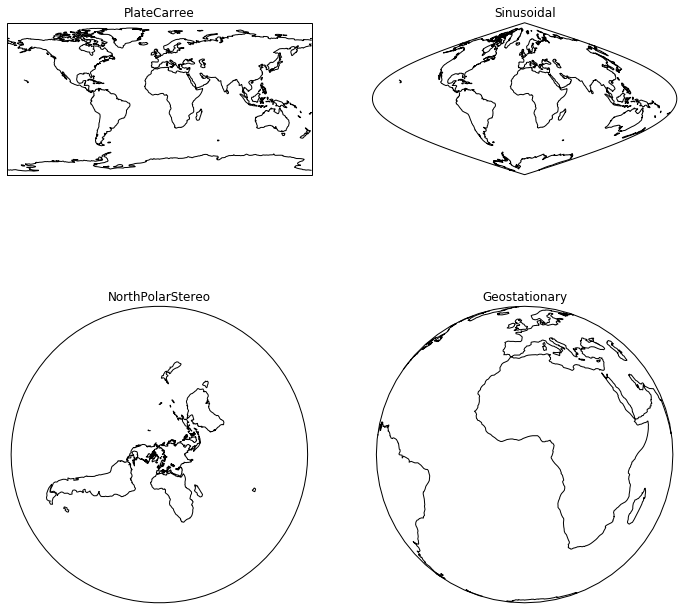

In [3]:
# Make sure the figure is a decent size when plotted.
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('PlateCarree')

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.Sinusoidal())
ax2.coastlines()
ax2.set_title('Sinusoidal')

ax1 = fig.add_subplot(2, 2, 3, projection=ccrs.NorthPolarStereo())
ax1.coastlines()
ax1.set_title('NorthPolarStereo')

ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Geostationary())
ax2.coastlines()
ax2.set_title('Geostationary')

# Show all subplots on the same figure.
#plt.show()

- 三维的地球无法完美地投影到平面上。

- 某些实际地理特性无法保持：
  - Area
  - Shape
  - Direction
  - Distance
  - Scale

> All models (map projections) are wrong, but some are useful. - Phileas Elson (SciPy 2018)

## 添加经纬度标签

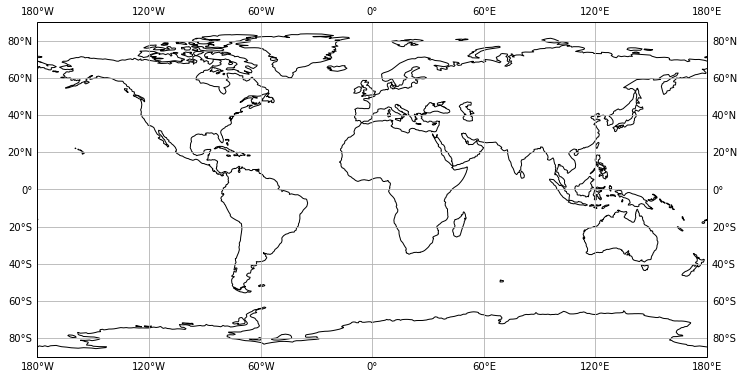

In [4]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# latitude and longitude with east and west, etc.
plt.figure(figsize=(12, 8))
m = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m.coastlines()

我们可以改变地图的中心点，还可以用 `stock_img` 来叠加一个默认的背景图

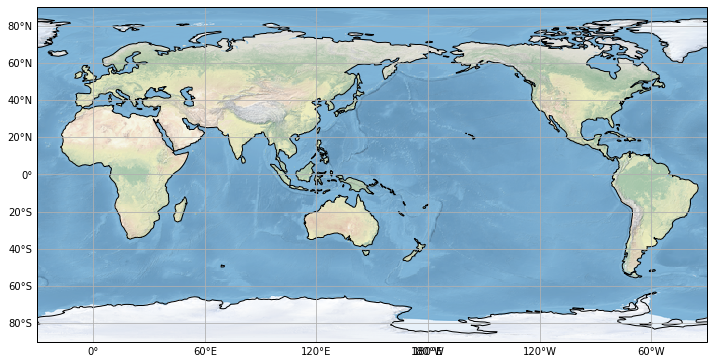

In [5]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker

# latitude and longitude with east and west, etc.
plt.figure(figsize=(12, 8))
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
grid_lines = m.gridlines(draw_labels=True)
grid_lines.xlabels_top = False
grid_lines.ylabels_right = False
#grid_lines.xlocator = mticker.FixedLocator([0,60,120,180,-180,-120,-60])
grid_lines.xformatter = LONGITUDE_FORMATTER #LongitudeFormatter(zero_direction_label=True)
grid_lines.yformatter = LATITUDE_FORMATTER #LatitudeFormatter()
m.coastlines()
m.stock_img()

## 地图特性 The Feature Interface

We've used part of the cartopy feature interface to draw the coastlines on these plots. The coastlines method is provided as part of the cartopy GeoAxes class API as a convenience method. There are a number of commonly used geographic features provided as convenience attributes of the cartopy feature class:

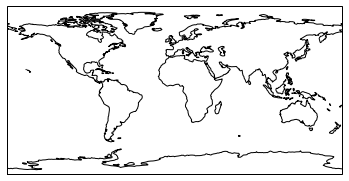

In [6]:
# Add coastlines to the map.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)  # Equivalent to `ax.coastlines()`

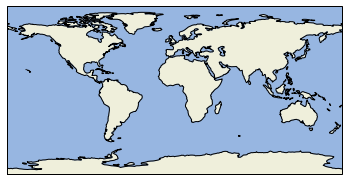

In [7]:
# Add land and ocean features, that come with preset face colours.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)

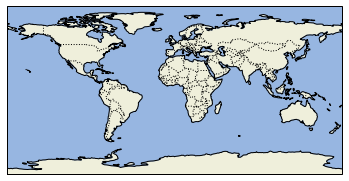

In [8]:
# Add country borders.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.BORDERS, linestyle=':')

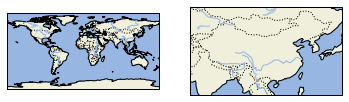

In [9]:
# And finally, add lakes and rivers.
plt.figure()
for i_subplot in (121, 122):
    ax = plt.subplot(i_subplot, projection=ccrs.PlateCarree())
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.BORDERS, linestyle=':')
    ax.add_feature(cfeat.LAKES, alpha=0.5)
    ax.add_feature(cfeat.RIVERS)
    if i_subplot == 122:
        #ax.set_extent((-175, -90, 40, 70))
        ax.set_extent((70, 140, 15, 50))

## Transforming data

To draw cartographic data, we use the standard `matplotlib` plotting routines with an additional``transfor`` keyword argument. The value of the `transform` argument should be the cartopy coordinate reference system of ***the data being plotted.***

First let's plot a line on a `PlateCarree` projection.

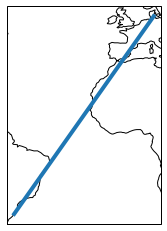

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
x0, y0 = -50, -30 #104, 1.3
x1, y1 = 10, 55 #113, 22
plt.plot([x0, x1], [y0, y1], linewidth=4)

Now let's try plotting the same line on an `EquidistantConic` projection.

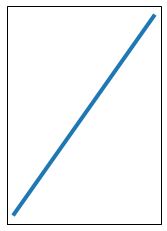

In [11]:
proj = ccrs.EquidistantConic()

ax = plt.axes(projection=proj)
ax.coastlines()
plt.plot([x0, x1], [y0, y1], linewidth=4)

The above plot **is not** what we intended.
We have set up the axes to be in the `Equidistant Conic` projection, but we have not told Cartopy that the coordinates of the line are **"in PlateCarree"**.
To do this, we use the `transform` keyword in the `plt.plot` function :

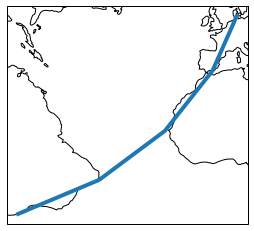

In [12]:
ax = plt.axes(projection=proj)
ax.coastlines()
plt.plot([x0, x1], [y0, y1], linewidth=4, transform=ccrs.PlateCarree())

Notice that the plotted line is bent : It is a straight line ***in the coordinate system it is defined in***, so that makes it a curved line on this map.

Also note that, unless we specify a map extent by `set_extent`, the map zooms to contain just the plotted data.
A very simple alternative to that is to plot the 'full map', by calling the `set_global` method on the Axes, as in this case :

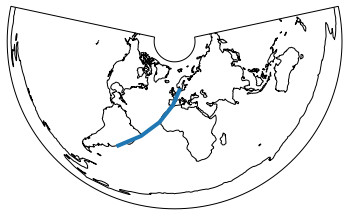

In [13]:
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
plt.plot([x0, x1], [y0, y1], linewidth=4, transform=ccrs.PlateCarree())

### 例子：珠海到伦敦

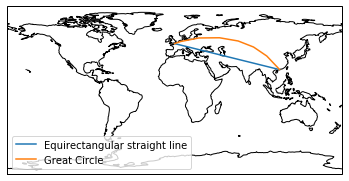

In [14]:
# create some test data
zhuhai = dict(lon=113, lat=22)
london = dict(lon=0, lat=50)
lons = [zhuhai['lon'], london['lon']]
lats = [zhuhai['lat'], london['lat']]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line') #, transform=ccrs.PlateCarree())
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

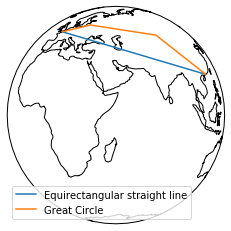

In [15]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=50))
ax.plot(lons, lats, label='Equirectangular straight line', transform=ccrs.PlateCarree())
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

##  绘制二维 (Raster) 数据

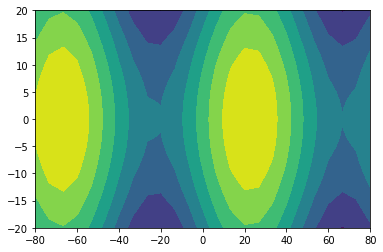

In [16]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(-20, 20, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any `transform` keyword. This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

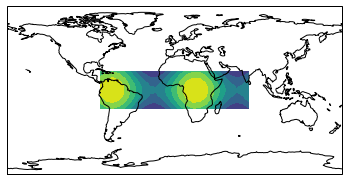

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

但是，当我们在另一个不同的投影方法下做同样的事情，我们可能得到错误的结果：

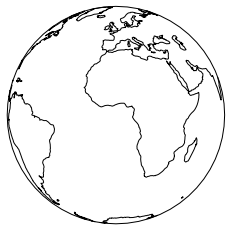

In [18]:
#projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

要改正它，我们需要给 `contourf` 传递正确的 `transform` 参数：

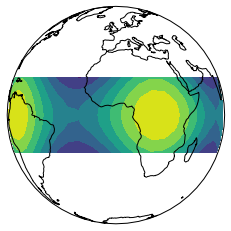

In [19]:
#projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

## 与 `xarray`结合绘图

In [20]:
import os
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc')

dataset = xr.open_dataset(fname)
#from netCDF4 import Dataset as netcdf_dataset
#dataset = netcdf_dataset(fname) 
#sst = dataset.variables['sst'][0, :, :]
#lats = dataset.variables['lat'][:]
#lons = dataset.variables['lon'][:]

#ax = plt.axes(projection=ccrs.PlateCarree())

#plt.contourf(lons, lats, sst, 60,
#             transform=ccrs.PlateCarree())

#ax.coastlines()

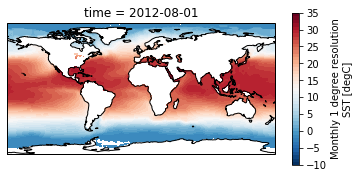

In [21]:
sst = dataset.sst.isel(time=0)
# 非常关键的语句
ax = plt.axes(projection=ccrs.PlateCarree())
sst.plot.contourf(x='lon',y='lat',vmin=-10,vmax=35,levels=46,cmap='RdBu_r',
                  transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.7})
ax.coastlines()

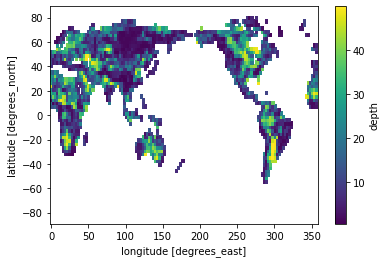

In [22]:
# add_cyclic example
ds = xr.open_dataset("example.nc")
ds['depth'].plot()

In [23]:
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Data variables:
    depth    (lat, lon) float64 ...

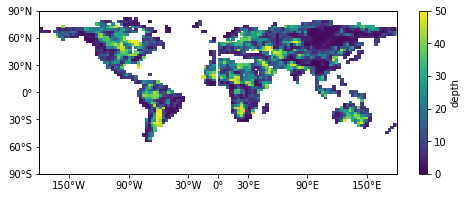

In [24]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, projection=proj, aspect='auto')

pc = ax.pcolormesh(ds.lon, ds.lat, ds.depth, vmin=0, vmax=50)
cb = plt.colorbar(pc, ax=ax, orientation='vertical')
cb.set_label(ds.depth.name)

ax.set_global()
ax.set_xticks([-150, -90, -30, 0, 30, 90, 150], crs=proj)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

In [25]:
from cartopy.util import add_cyclic_point

data = ds['depth']
lon = ds.coords['lon']

print("Original shape -", data.shape)
lon_idx = data.dims.index('lon')
wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)
print("New shape -", wrap_data.shape)

Original shape - (64, 128)
New shape - (64, 129)


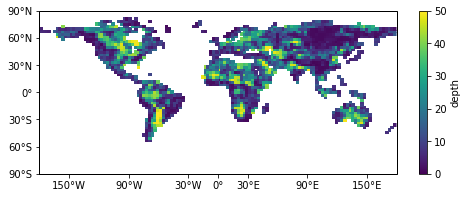

In [26]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, projection=proj, aspect='auto')

pc = ax.pcolormesh(wrap_lon, ds.lat, wrap_data, vmin=0, vmax=50)
cb = plt.colorbar(pc, ax=ax, orientation='vertical')
cb.set_label(ds.depth.name)

ax.set_global()
ax.set_xticks([-150, -90, -30, 0, 30, 90, 150], crs=proj)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

### 另一种（更好的）解决方案

之前我们学过：`xarray.dataset.assign_coords` 可以用来改变坐标值。

In [27]:
ds_new = ds.assign_coords({'lon':(((ds.lon+180)%360)-180)})
# 或者
# ds_new = ds.assign_coords(lon = (((ds.lon+180)%360)-180))
ds_new

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... -11.25 -8.438 -5.625 -2.812
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Data variables:
    depth    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

可以进一步用 `sortby` 来把坐标换成我们习惯的顺序，但并不是必须的。

In [28]:
ds_new = ds.assign_coords({'lon':(((ds.lon+180)%360)-180)}).sortby('lon')
ds_new

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Data variables:
    depth    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

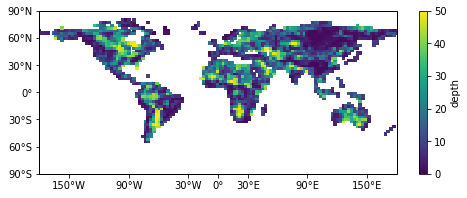

In [29]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, projection=proj, aspect='auto')

ds_new.depth.plot.pcolormesh(ax=ax,vmin=0,vmax=50)

ax.set_global()
ax.set_xticks([-150, -90, -30, 0, 30, 90, 150], crs=proj)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

## 展示图像

Text(-117, 33, 'San Diego')

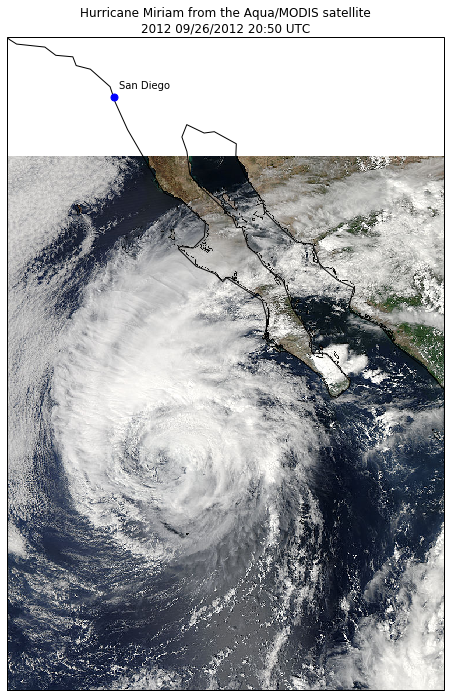

In [30]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Shapefile

The shapefile format:

- Is a digital vector storage format for storing geometric location and associated attribute information.
- Geographic features in a shapefile can be represented by points, lines, or polygons (areas)
- Is non-topological. It does not maintain spatial relationship information such as connectivity, adjacency, and area definition.
- Was introduced with ArcView GIS version 2 in the early 1990s.

Every shapefile data set includes at least three files:

- .shp: The main file that contains the primary geographic reference data and records of various shape types included, such as points, polygons, or multipatches.
- .dbf: The dBase file that stores attributes for each shape. It alows quicker access to the spatial features of the data.
- .shx: Organize the records of a shapefile for reference.

### 例子: 单独显示某个国家

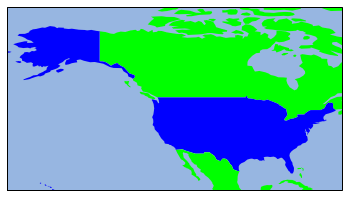

In [31]:
import cartopy.io.shapereader as shapereader
 
shpfilename = shapereader.natural_earth(resolution='110m', \
                                      category='cultural', \
                                      name='admin_0_countries')

reader = shapereader.Reader(shpfilename)
countries = reader.records()

# Select the map projection
#----------------------
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([-170, -65, 20, 70])
 
for c in countries:
    if c.attributes['ADM0_A3'] == 'USA':
        ax.add_geometries([c.geometry], \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1), \
                          label=c.attributes['ADM0_A3'])
    else:
        #print(type(c.geometry))
        ax.add_geometries([c.geometry],ccrs.PlateCarree(), \
                          facecolor=(0, 1, 0), \
                          label=c.attributes['ADM0_A3'])

### 例子：显示多个国家

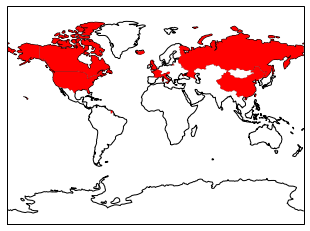

In [32]:
#import cartopy.feature as cfeat

def area(ax, iso, clr) :
    shp = shapereader.natural_earth(resolution='110m',category='cultural',
                                  name='admin_0_countries')
    reader = shapereader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries([n.geometry], ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.15, edgecolor = "black",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['USA','CAN','RUS','GBR','ISL','FRA','ITA','CHN','TWN','AUT']

ax = plt.axes(projection=ccrs.Miller())
ax.add_feature(cfeat.COASTLINE)
#ax.coastlines()

for n in iso3 :
    area(ax, n, "red")

## 中国地图

中国地图常见的错误
![](./China_map_problems.jpg)

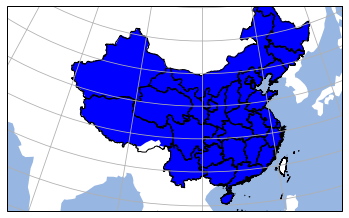

In [33]:
# import cartopy.io.shapereader as shapereader
shpfilename = shapereader.natural_earth(resolution='110m', \
                                      category='cultural', \
                                      name='admin_0_countries')

reader = shapereader.Reader(shpfilename)
countries = reader.records()

# Select the map projection
#----------------------
#ax = plt.axes(projection=ccrs.Mercator())
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105, central_latitude=90,
                             false_easting=400000, false_northing=400000))
ax.add_feature(cfeat.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([70, 130, 15, 50])
 
for country in countries:
    if country.attributes['ADM0_A3'] == 'CHN':
        ax.add_geometries([country.geometry], \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1),
                          label=country.attributes['ADM0_A3'])
    else:
        ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                          facecolor=(1, 1, 1), \
                          label=country.attributes['ADM0_A3'])
        
# China provinces 
shp = '../shp_file/Province_9.shp'
rd = shapereader.Reader(shp)
provinces = cfeat.ShapelyFeature(rd.geometries(),ccrs.PlateCarree(), edgecolor='k', facecolor='none')
ax.add_feature(provinces,linewidth=1)
ax.gridlines(draw_labels=False)